In [2]:
import pandas as pd
import numpy

PenisData = pd.read_csv("C:/Users/megin/OneDrive/Documenten/DAta/penis.csv")

In [3]:
PenisData.columns


Index(['Country', 'Region', 'length_flaccid', 'length_erect',
       'circumf_flaccid', 'circumf_erect', 'volume_erect', 'volume_flaccid',
       'Method', 'N', 'Source', 'growth_length', 'growth_circumf',
       'growth_volume'],
      dtype='object')

In [4]:
penis = PenisData.loc[:,["length_flaccid", "length_erect", "Method", "Country"]]
penis['Method-ID'] = penis['Method'].map({'Self reported': 0,'Measured':1 })

penis.sample(10)

,length_flaccid,length_erect,Method,Country,Method-ID
93,8.7,12.85,Self reported,Oman,0
125,6.9,9.43,Measured,Thailand,1
36,11.1,15.99,Self reported,Dominican Republic,0
61,8.5,11.58,Measured,Iran,1
80,9.4,13.82,Self reported,Luxembourg,0
127,9.9,14.61,Measured,Tunisia,1
6,10.0,15.70,Self reported,Australia,0
9,8.2,11.20,Measured,Bangladesh,1
96,10.7,15.49,Self reported,Panama,0
108,9.7,14.30,Measured,Scotland,1


<AxesSubplot:>

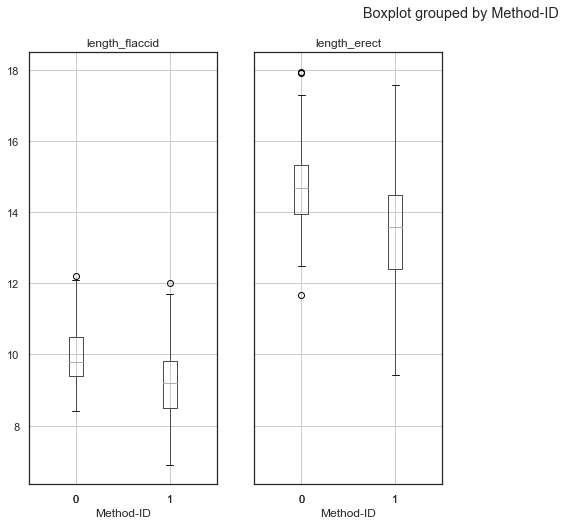

In [5]:
#penis['Region-ID'] = penis['Region'].map({'Central Asia': 0, 'Europe': 1, 'Africa': 2, 'South America': 3, 'Southeast Asia': 4, 'Western Asia': 5,'Pacific Islands': 6,'Australia': 7,'North America': 8,'Central America/Caribean	': 9 ,'Asia': 10})
#penis.sample(10)
penis['Method-ID'] = penis['Method'].map({'Self reported': 0,'Measured':1 })
Penisfeatures = tuple(penis.columns[:2].values)
penis.boxplot(column=Penisfeatures, by='Method-ID', figsize=(15,8), layout=(1,4));
penis.boxplot(column = "Method-ID")

(array([ 8.,  3.,  9., 14., 23., 31., 27., 13.,  6.,  5.]),
 array([ 9.43 , 10.282, 11.134, 11.986, 12.838, 13.69 , 14.542, 15.394,
        16.246, 17.098, 17.95 ]),
 <BarContainer object of 10 artists>)

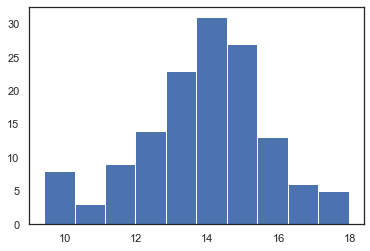

In [6]:
import matplotlib.pyplot as plt
pp = PenisData[['length_erect']]

plt.hist(pp)

In [7]:
country = PenisData[['Country']]


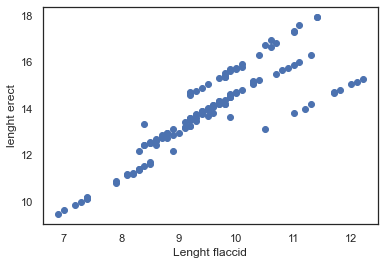

In [8]:
x = PenisData[['length_flaccid']]
y = pp
plt.xlabel('Lenght flaccid')
plt.ylabel('lenght erect')
plt.scatter(x,y)

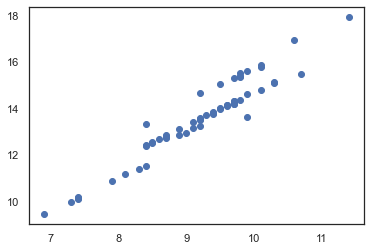

In [9]:
test_x = x[80:]
test_y = y[80:]
plt.scatter(test_x, test_y)

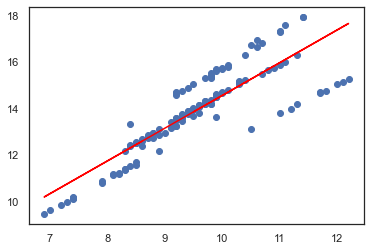

In [10]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
Y_pred = linear_regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()

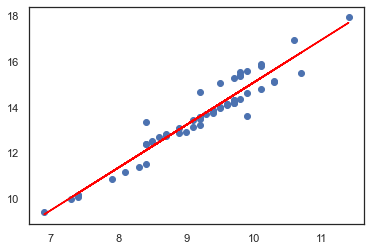

In [28]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(test_x, test_y)  # perform linear regression
Y_pred = linear_regressor.predict(test_x)

plt.scatter(test_x, test_y)
plt.plot(test_x, Y_pred, color='red')
plt.show()

In [12]:
grouped_single = PenisData.groupby('Region').agg({'length_erect': ['mean', 'min', 'max']})

print(grouped_single)

                         length_erect              
                                 mean    min    max
Region                                             
Africa                      15.281364  11.50  17.95
Asia                        11.652308   9.60  14.16
Australia                   15.745000  15.70  15.79
Central America/Caribean    14.723000  12.40  16.30
Central Asia                13.575000  13.46  13.69
Europe                      14.213250  12.18  15.60
North America               14.007500  13.87  14.15
Pacific Islands             13.265000  12.87  14.19
South America               15.375000  13.34  17.59
South Asia                  11.488000  10.18  12.93
Southeast Asia              10.614286   9.43  11.67
Western Asia                13.255625  11.38  16.82


In [13]:
import matplotlib.pyplot as plt
data = penis[['length_erect']]

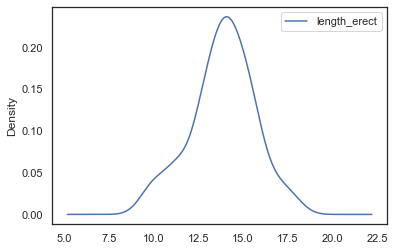

In [14]:
wards = data
wards.plot.kde();

<Figure size 432x288 with 0 Axes>

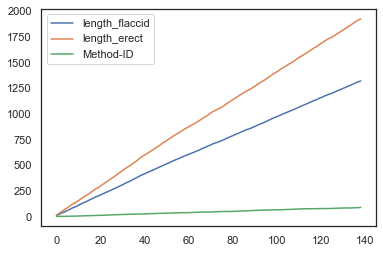

In [15]:
bb = penis.cumsum()

plt.figure();

bb.plot();

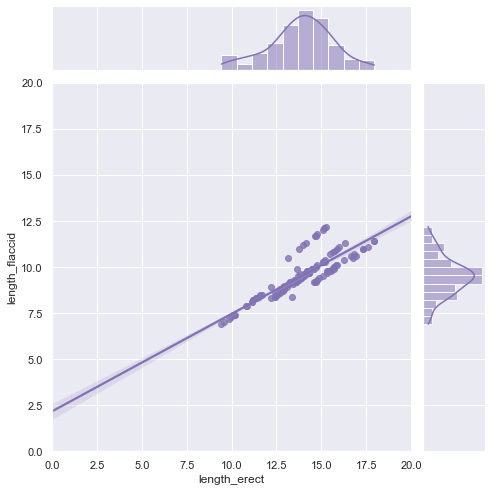

In [16]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="length_erect", y="length_flaccid", data=penis,
                  kind="reg", truncate=False,
                  xlim=(0, 20), ylim=(0, 20),
                  color="m", height=7)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


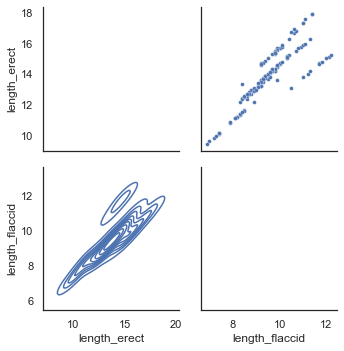

In [18]:
import seaborn as sns
sns.set_theme(style="white")



g = sns.PairGrid(dick, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)


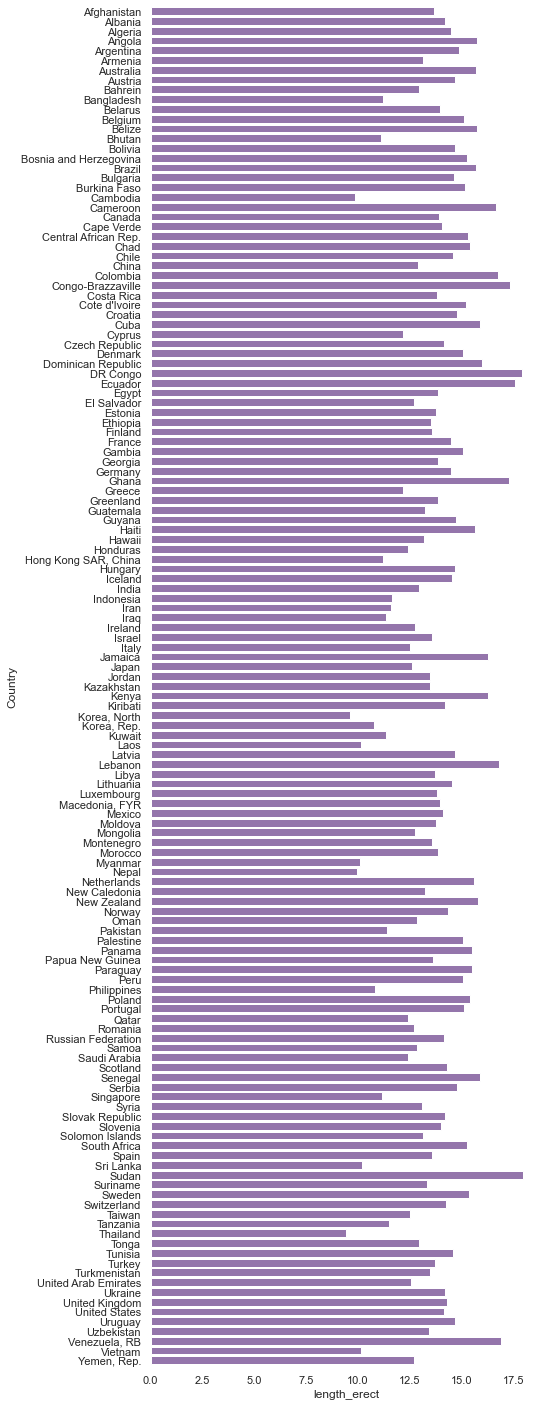

In [29]:
import seaborn as sns
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 25))
sns.set_color_codes("muted")
sns.barplot(x="length_erect", y="Country", data=penis,
            label="Alcohol-involved", color="m")
sns.despine(left=True, bottom=True)

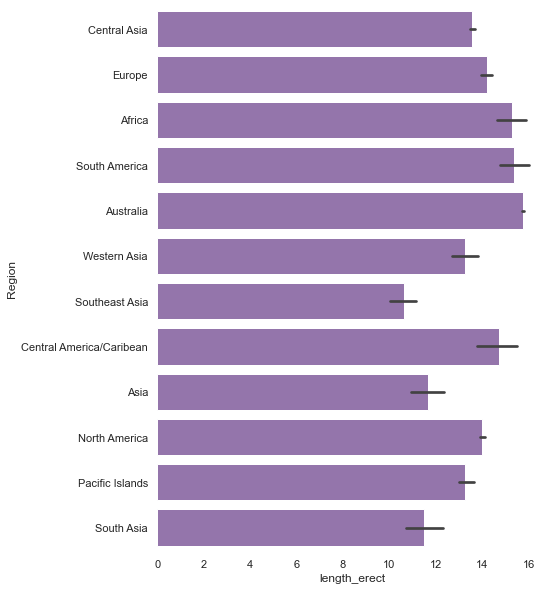

In [33]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 10))
sns.set_color_codes("muted")
sns.barplot(x="length_erect", y="Region", data=PenisData,
            label="Alcohol-involved", color="m")
sns.despine(left=True, bottom=True)